## Classify Articles:Three Steps
- Start with a corpus of articles
- Identify underlying themes using kmeans++
- Assign themes to new article


In [1]:
#We have 2804 articles under a folder, read and store them in a List of articles
#In case error reading so many files in Jupyter
#Step1:On CMD Prompt: $ jupyter notebook --generate-config
#Step2: Open the file displayed above and search for c.NotebookApp.iopub_data_rate_limit
#Step3: Comment out the line c.NotebookApp.iopub_data_rate_limit = 1000000 and increase one more zero

articles = []
for i in range(0, 2804):
    with open('Data/NLP/%s.txt'%i, 'r') as file:
        text = file.read()
        articles.append(text)

In [1]:
#print(articles)

In [2]:
#Convert text to TF-IDF representation
from sklearn.feature_extraction.text import TfidfVectorizer

#By setting stopwords to relevant language, it will ignore the stopwords
vectorizer = TfidfVectorizer(max_df=0.5,min_df=2,stop_words='english')

X = vectorizer.fit_transform(articles)
X


<2804x13220 sparse matrix of type '<class 'numpy.float64'>'
	with 280835 stored elements in Compressed Sparse Row format>

Cluster = 1 wcss = 2708.9919234273066
Cluster = 2 wcss = 2678.878747558282
Cluster = 3 wcss = 2655.0533240237596
Cluster = 4 wcss = 2637.8093069612523
Cluster = 5 wcss = 2617.768022116416
Cluster = 6 wcss = 2601.2448421961967
Cluster = 7 wcss = 2585.2348984784826
Cluster = 8 wcss = 2577.7206582866697
Cluster = 9 wcss = 2562.406257499248
Cluster = 10 wcss = 2556.24989937093


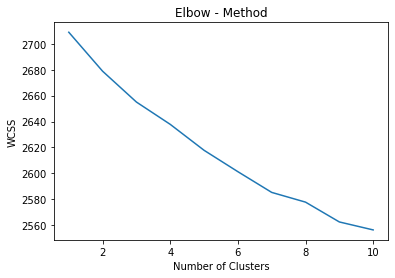

In [4]:
# Using the elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(X)
    print("Cluster = {0} wcss = {1}".format(i, k_means.inertia_))
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow - Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
#X[0]
num_clus = 3
from sklearn.cluster import KMeans

#max_iter means if algorithm don't converge even after this no# of iteration, it will stop
km = KMeans(n_clusters = num_clus, init = 'k-means++', max_iter = 100, n_init = 1, verbose = True)
km.fit(X)

Initialization complete
Iteration  0, inertia 5307.140
Iteration  1, inertia 2687.485
Iteration  2, inertia 2677.779
Iteration  3, inertia 2672.270
Iteration  4, inertia 2669.639
Iteration  5, inertia 2669.005
Iteration  6, inertia 2668.738
Iteration  7, inertia 2668.529
Iteration  8, inertia 2668.343
Iteration  9, inertia 2668.186
Iteration 10, inertia 2668.023
Iteration 11, inertia 2667.812
Iteration 12, inertia 2667.674
Iteration 13, inertia 2667.510
Iteration 14, inertia 2667.433
Iteration 15, inertia 2667.402
Iteration 16, inertia 2667.387
Iteration 17, inertia 2667.381
Iteration 18, inertia 2667.376
Iteration 19, inertia 2667.373
Converged at iteration 19: center shift 0.000000e+00 within tolerance 7.307995e-09


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=True)

In [6]:
import numpy as np

#km.lables_ is an attribute of K-means object. unique function will print the unique clusters name with each article have been assign one cluster
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 452, 1943,  409], dtype=int64))

In [8]:
#Colelct articles in each cluster
cluster={}
for i,clus_no in enumerate(km.labels_):
        indiv_doc = articles[i]
        if clus_no not in cluster.keys():
            cluster[clus_no] = indiv_doc
        else:
            cluster[clus_no] += indiv_doc

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import defaultdict
from string import punctuation
from heapq import nlargest
import nltk

_stopwords = set(stopwords.words('english') + list(punctuation)+["month","year","day","'s","''","``"])

#Top keywords in each cluster and their count
keywords = {}
counts={}
for clus_no in range(num_clus):
    word_sent = word_tokenize(cluster[clus_no].lower())
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    keywords[clus_no] = nlargest(100, freq, key=freq.get)
    counts[clus_no]=freq


                                                                 
                                        

In [13]:
#Find unique keywords in each cluster
unique_keys={}
for clus_no in range(num_clus):
    rest_clusters=list(set(range(num_clus))-set([clus_no]))
    #collect all the keywords from other clusters
    for i in range(num_clus - 1):
        if i == 0:
            keywords_other_clusters=set(keywords[rest_clusters[i]])
        else:
            keywords_other_clusters=keywords_other_clusters.union(set(keywords[rest_clusters[i]]))
    #Take out these keywords from the whole set to get unique keywords
    unique=set(keywords[clus_no])-keywords_other_clusters
    #Store top 10 keywords 
    unique_keys[clus_no]=nlargest(10, unique, key=counts[clus_no].get)

In [14]:
unique_keys

{0: ['quarter',
  'share',
  'profit',
  'rose',
  'analysts',
  'earnings',
  'fell',
  'cents',
  'net',
  'per'],
 1: ['ads',
  'video',
  'products',
  'internet',
  'use',
  'product',
  'search',
  'apps',
  'pay',
  'buy'],
 2: ['uber',
  'round',
  'valuation',
  'funding',
  'raised',
  'private',
  'capital',
  'lyft',
  'investment',
  'drivers']}

In [36]:
name_article = {0: "share_market", 1: "online_deal", 2: "startup_investment"}

article = "US-based Facebook has agreed to buy 9.99% equity stake in oil-to-retail conglomerate Reliance Industries Ltd’s telecommunications arm Reliance Jio for Rs 43,574 crore. While the Mukesh Ambani-led company said that Facebook and Jio will together further India’s digital economy, the deal in itself has retail at its core, as both Facebook and Reliance Jio eye a huge market of 1.3 billion Indians and Indian businesses. “Our focus will be India’s 60 million micro, small and medium businesses, 120 million farmers, 30 million small merchants and millions of small and medium enterprises in the informal sector,” Reliance Jio said in the statement announcing the deal. In fact, RIL has been building up to become a retail giant with several acquisitions and deals in the past as well."
from sklearn.neighbors import KNeighborsClassifier

#here K(n_neighbors)=5 by default
classifier = KNeighborsClassifier(n_neighbors=num_clus)

#training phase
classifier.fit(X,km.labels_)
test=vectorizer.transform([article.encode('ascii',errors='ignore')])
cluster_no = classifier.predict(test)
print("Article Category = %s" % name_article[list(cluster_no)[0]])

Article Category = online_deal
